In [2]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
#from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree



In [3]:
# Load dataset

bank_data = pd.read_csv("bankfull.csv", sep=";")
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:

# Encode categorical variables
label_encoder = LabelEncoder()
bank_data['job'] = label_encoder.fit_transform(bank_data['job'])
bank_data['marital'] = label_encoder.fit_transform(bank_data['marital'])
bank_data['education'] = label_encoder.fit_transform(bank_data['education'])
bank_data['default'] = label_encoder.fit_transform(bank_data['default'])
bank_data['housing'] = label_encoder.fit_transform(bank_data['housing'])
bank_data['loan'] = label_encoder.fit_transform(bank_data['loan'])
bank_data['contact'] = label_encoder.fit_transform(bank_data['contact'])
bank_data['month'] = label_encoder.fit_transform(bank_data['month'])
bank_data['day_of_week'] = label_encoder.fit_transform(bank_data['day'])
bank_data['poutcome'] = label_encoder.fit_transform(bank_data['poutcome'])
bank_data['y'] = label_encoder.fit_transform(bank_data['y'])



In [5]:
# Splitting dataset into features and target variable
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))



Accuracy: 0.8742673891407718
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.47      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



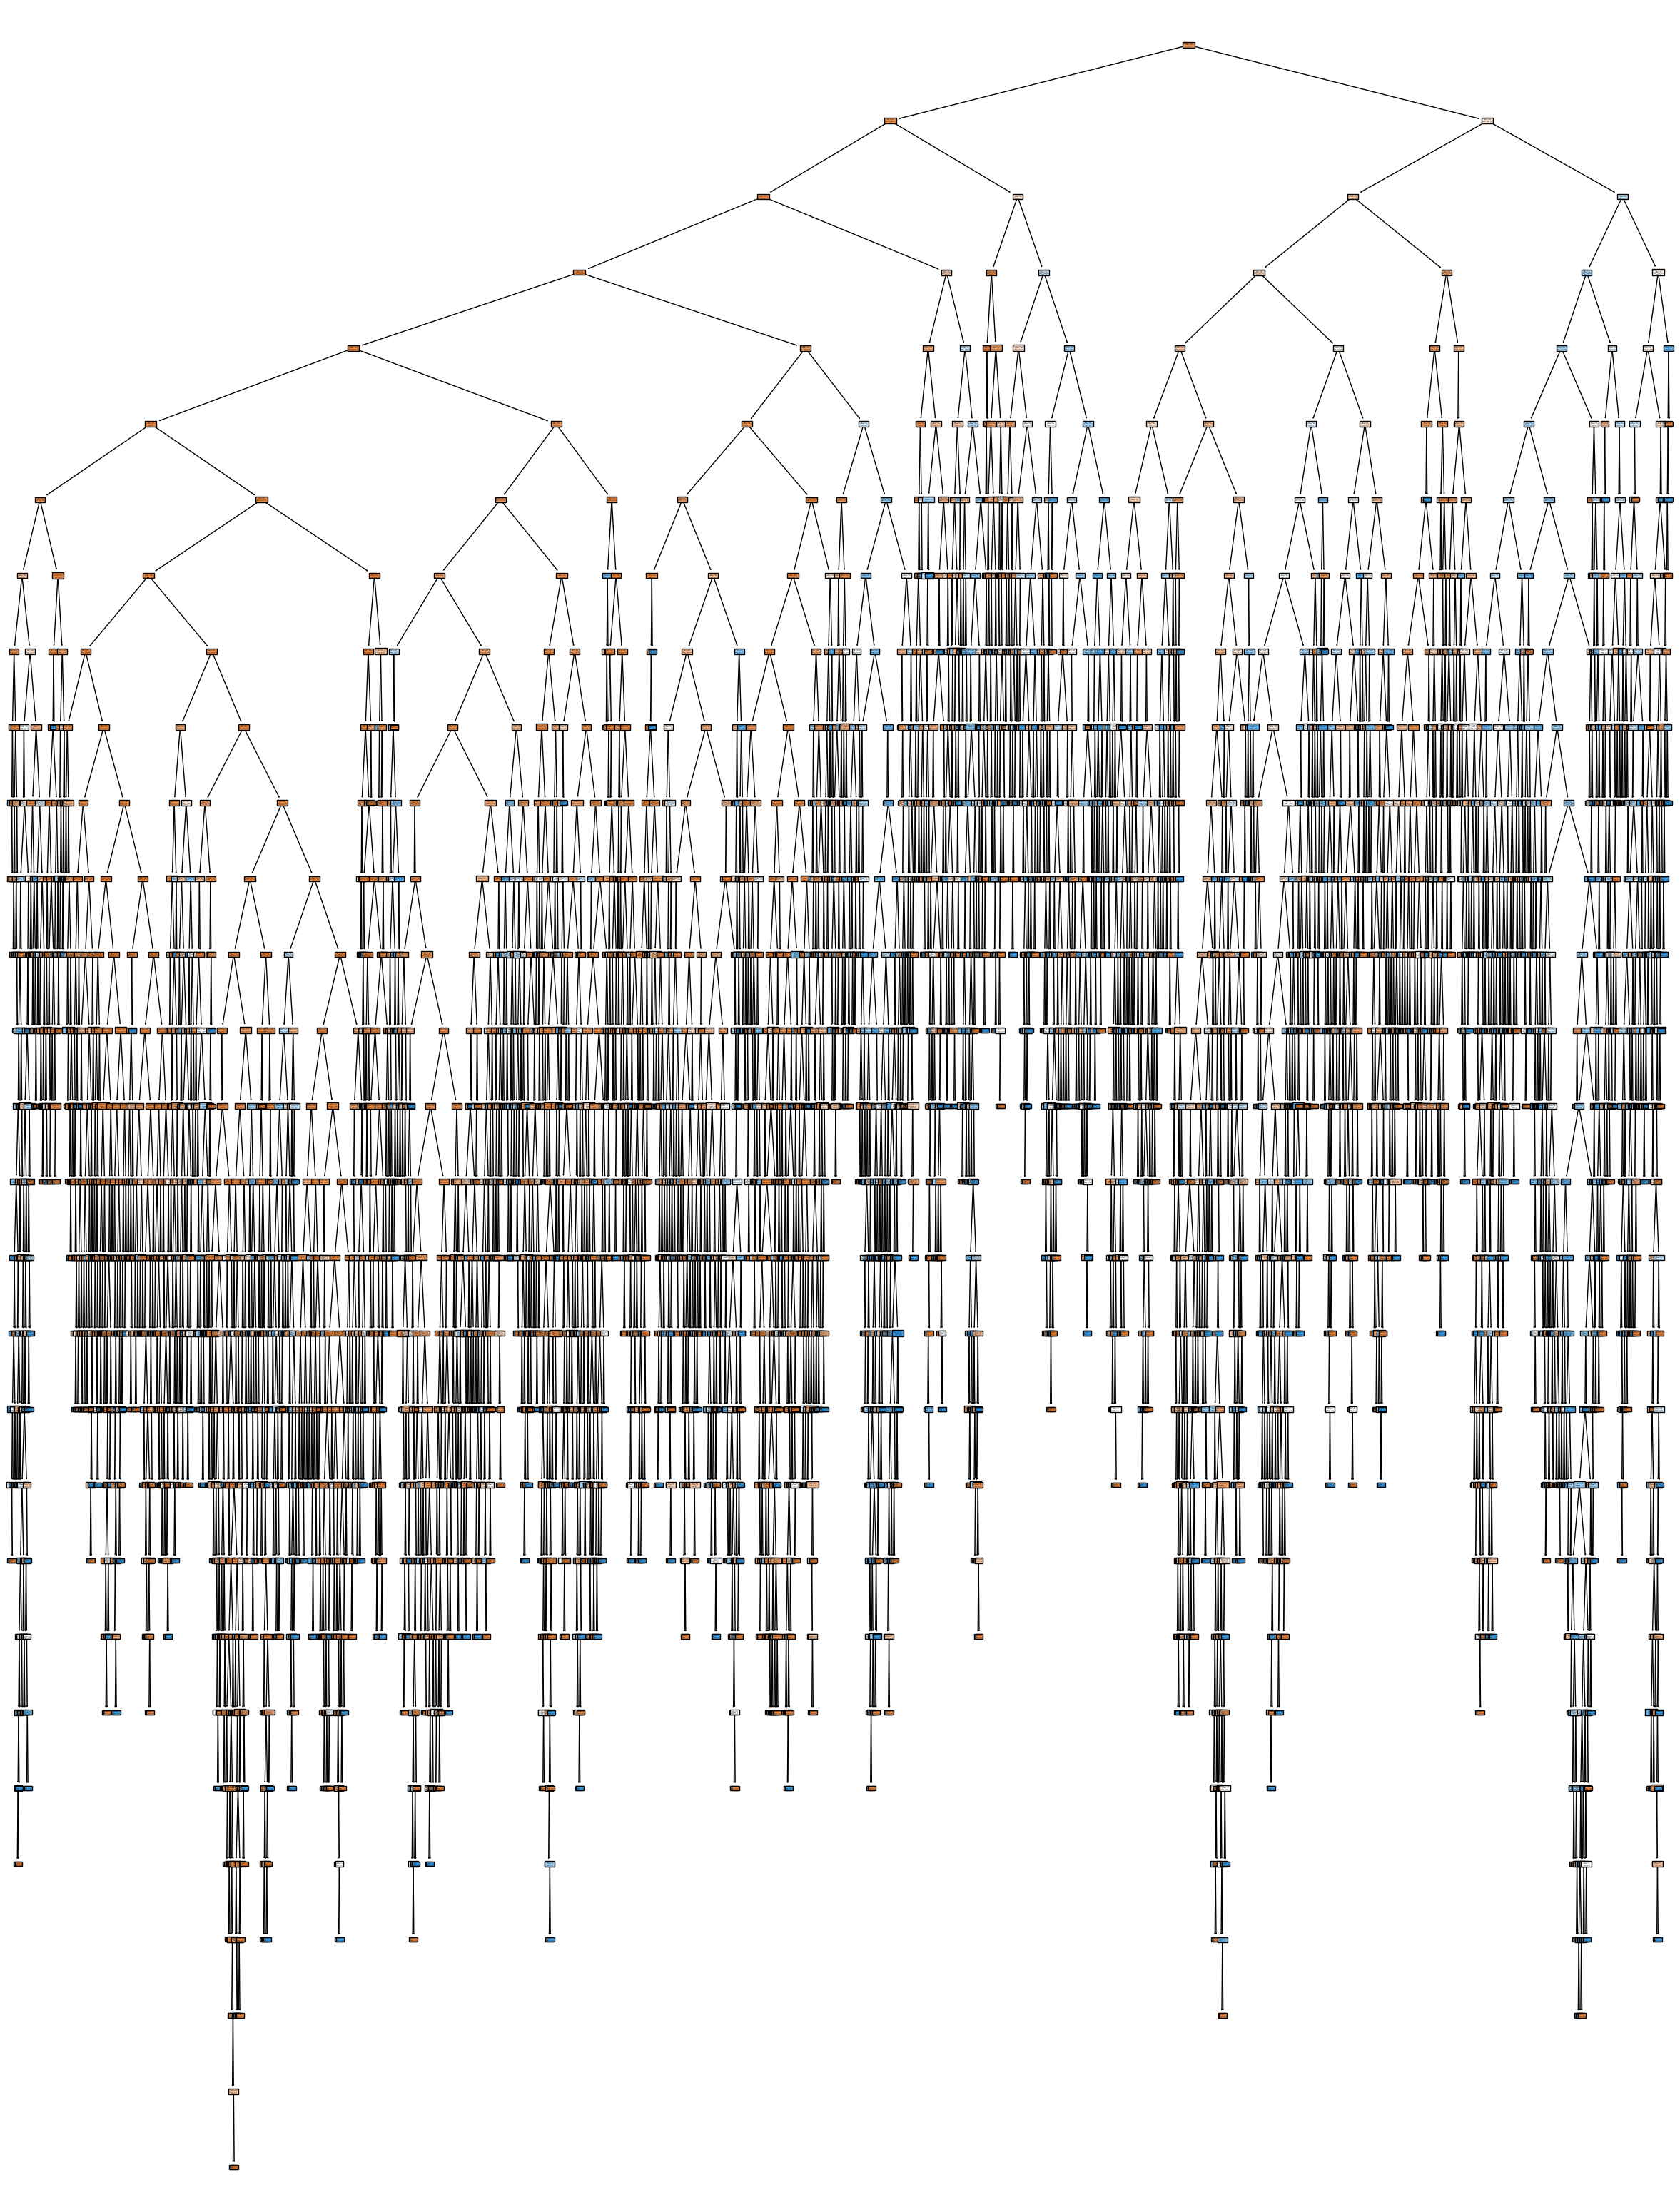

In [7]:
plt.figure(figsize=(30,40))

tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()